In [1]:
from energy_watch import data, classify, entropy

C:\Users\15103\Anaconda3\envs\build\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
bldg_data = data.Data()

In [3]:
bldg_data.get_data()

,time,B101,B103,B104,B107,B108,B109,B110,B111,B114,...,B051D,B051F,B051F_C1,B051F_C2,B051F_C3,B060A,B061A,B080A,B172W,B195W
0,1/1/2018 0:00,51.77,331.61,132.74,18.07,34.56,30.15,27.02,112.87,64.97,...,263.88,839.11,0.0,0.0,109.0,42.53,98.11,7.0,765.24,603.74
1,1/1/2018 0:15,51.94,328.49,135.46,18.01,34.20,30.79,27.18,111.47,64.12,...,265.17,842.14,0.0,0.0,109.0,20.70,98.05,7.0,764.57,596.06
2,1/1/2018 0:30,50.25,329.25,136.93,18.48,34.73,30.88,27.45,112.41,61.85,...,264.35,841.76,0.0,0.0,102.0,18.34,97.36,9.0,739.16,616.51
3,1/1/2018 0:45,49.47,324.16,135.75,18.85,34.24,31.66,27.35,111.43,65.34,...,264.52,846.41,0.0,0.0,106.0,18.21,97.00,7.0,773.27,596.79
4,1/1/2018 1:00,53.68,326.08,132.03,19.15,34.58,31.19,27.12,111.77,61.93,...,265.36,835.65,0.0,0.0,106.0,19.71,102.23,7.0,751.77,607.46
5,1/1/2018 1:15,48.76,322.45,134.81,18.75,34.63,30.40,26.47,112.20,62.61,...,267.39,841.60,0.0,0.0,101.0,18.71,98.37,7.0,766.64,602.56
6,1/1/2018 1:30,49.24,325.78,132.46,17.98,34.69,30.25,26.52,111.20,61.74,...,265.60,841.37,0.0,0.0,102.0,18.83,99.18,7.0,695.59,529.78
7,1/1/2018 1:45,47.94,322.79,132.03,18.63,34.57,30.53,27.69,116.38,61.25,...,264.38,842.76,0.0,0.0,102.0,19.97,98.78,7.0,727.60,520.24
8,1/1/2018 2:00,48.82,330.68,132.89,18.37,34.54,30.23,27.09,112.53,62.79,...,265.67,841.05,0.0,0.0,119.0,19.24,98.53,7.0,749.62,513.02
9,1/1/2018 2:15,52.11,327.74,130.05,18.14,34.67,30.60,26.65,111.85,60.53,...,265.82,839.68,0.0,0.0,107.0,20.27,98.19,9.0,767.58,516.68


In [4]:
bldg_data.replace_nan_0()

In [5]:
bldg_classify = classify.Classify(bldg_data, 30)

C:\Users\15103\Anaconda3\envs\build\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\15103\Anaconda3\envs\build\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
bldg_classify.get_classifications()[2]

[[-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [7]:
entr = entropy.Entropy(bldg_classify)

In [8]:
entr.get_entropy()

[['B101',
  'B103',
  'B104',
  'B107',
  'B108',
  'B109',
  'B110',
  'B111',
  'B114',
  'B115',
  'B116',
  'B117',
  'B118',
  'B119',
  'B123',
  'B124',
  'B126',
  'B129',
  'B130',
  'B131',
  'B132',
  'B135',
  'B136',
  'B138',
  'B139',
  'B141',
  'B144',
  'B145',
  'B146',
  'B147',
  'B148',
  'B149',
  'B151',
  'B152',
  'B153',
  'B155',
  'B158',
  'B159',
  'B160',
  'B165',
  'B167',
  'B170',
  'B173',
  'B177',
  'B180',
  'B181',
  'B182',
  'B184',
  'B189',
  'B196',
  'B199',
  'B200',
  'B203',
  'B302',
  'B318',
  'B320',
  'B336',
  'B362',
  'B790',
  'B002',
  'B003',
  'B006',
  'B007',
  'B008',
  'B009',
  'B010',
  'B011',
  'B012',
  'B013',
  'B014',
  'B015',
  'B017',
  'B018',
  'B020',
  'B022',
  'B024',
  'B025',
  'B026',
  'B029',
  'B030',
  'B031',
  'B032',
  'B033',
  'B035',
  'B036',
  'B038',
  'B039',
  'B040',
  'B041',
  'B045',
  'B046',
  'B047',
  'B050',
  'B051W',
  'B051',
  'B052',
  'B054',
  'B056',
  'B057',
  'B058',

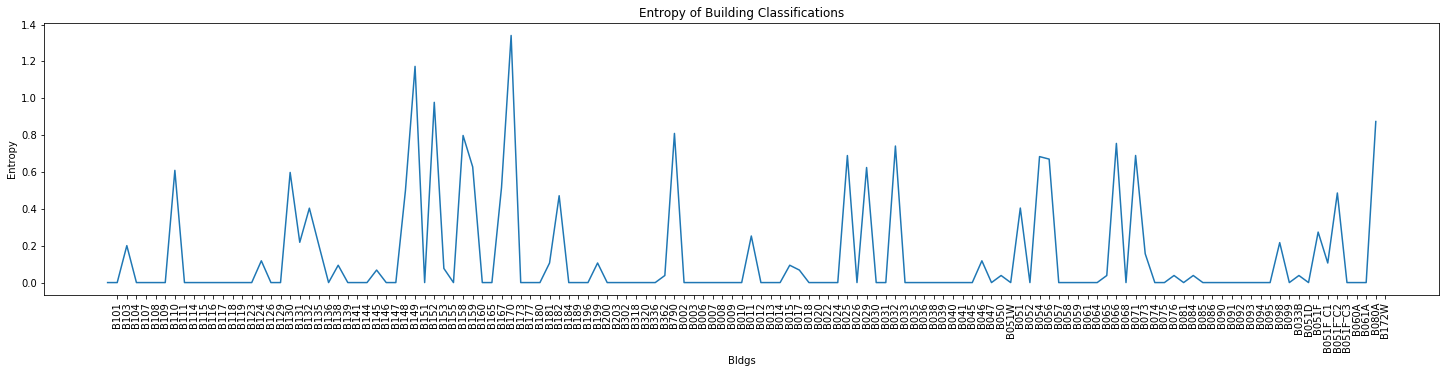

In [9]:
entr.graph_entr()

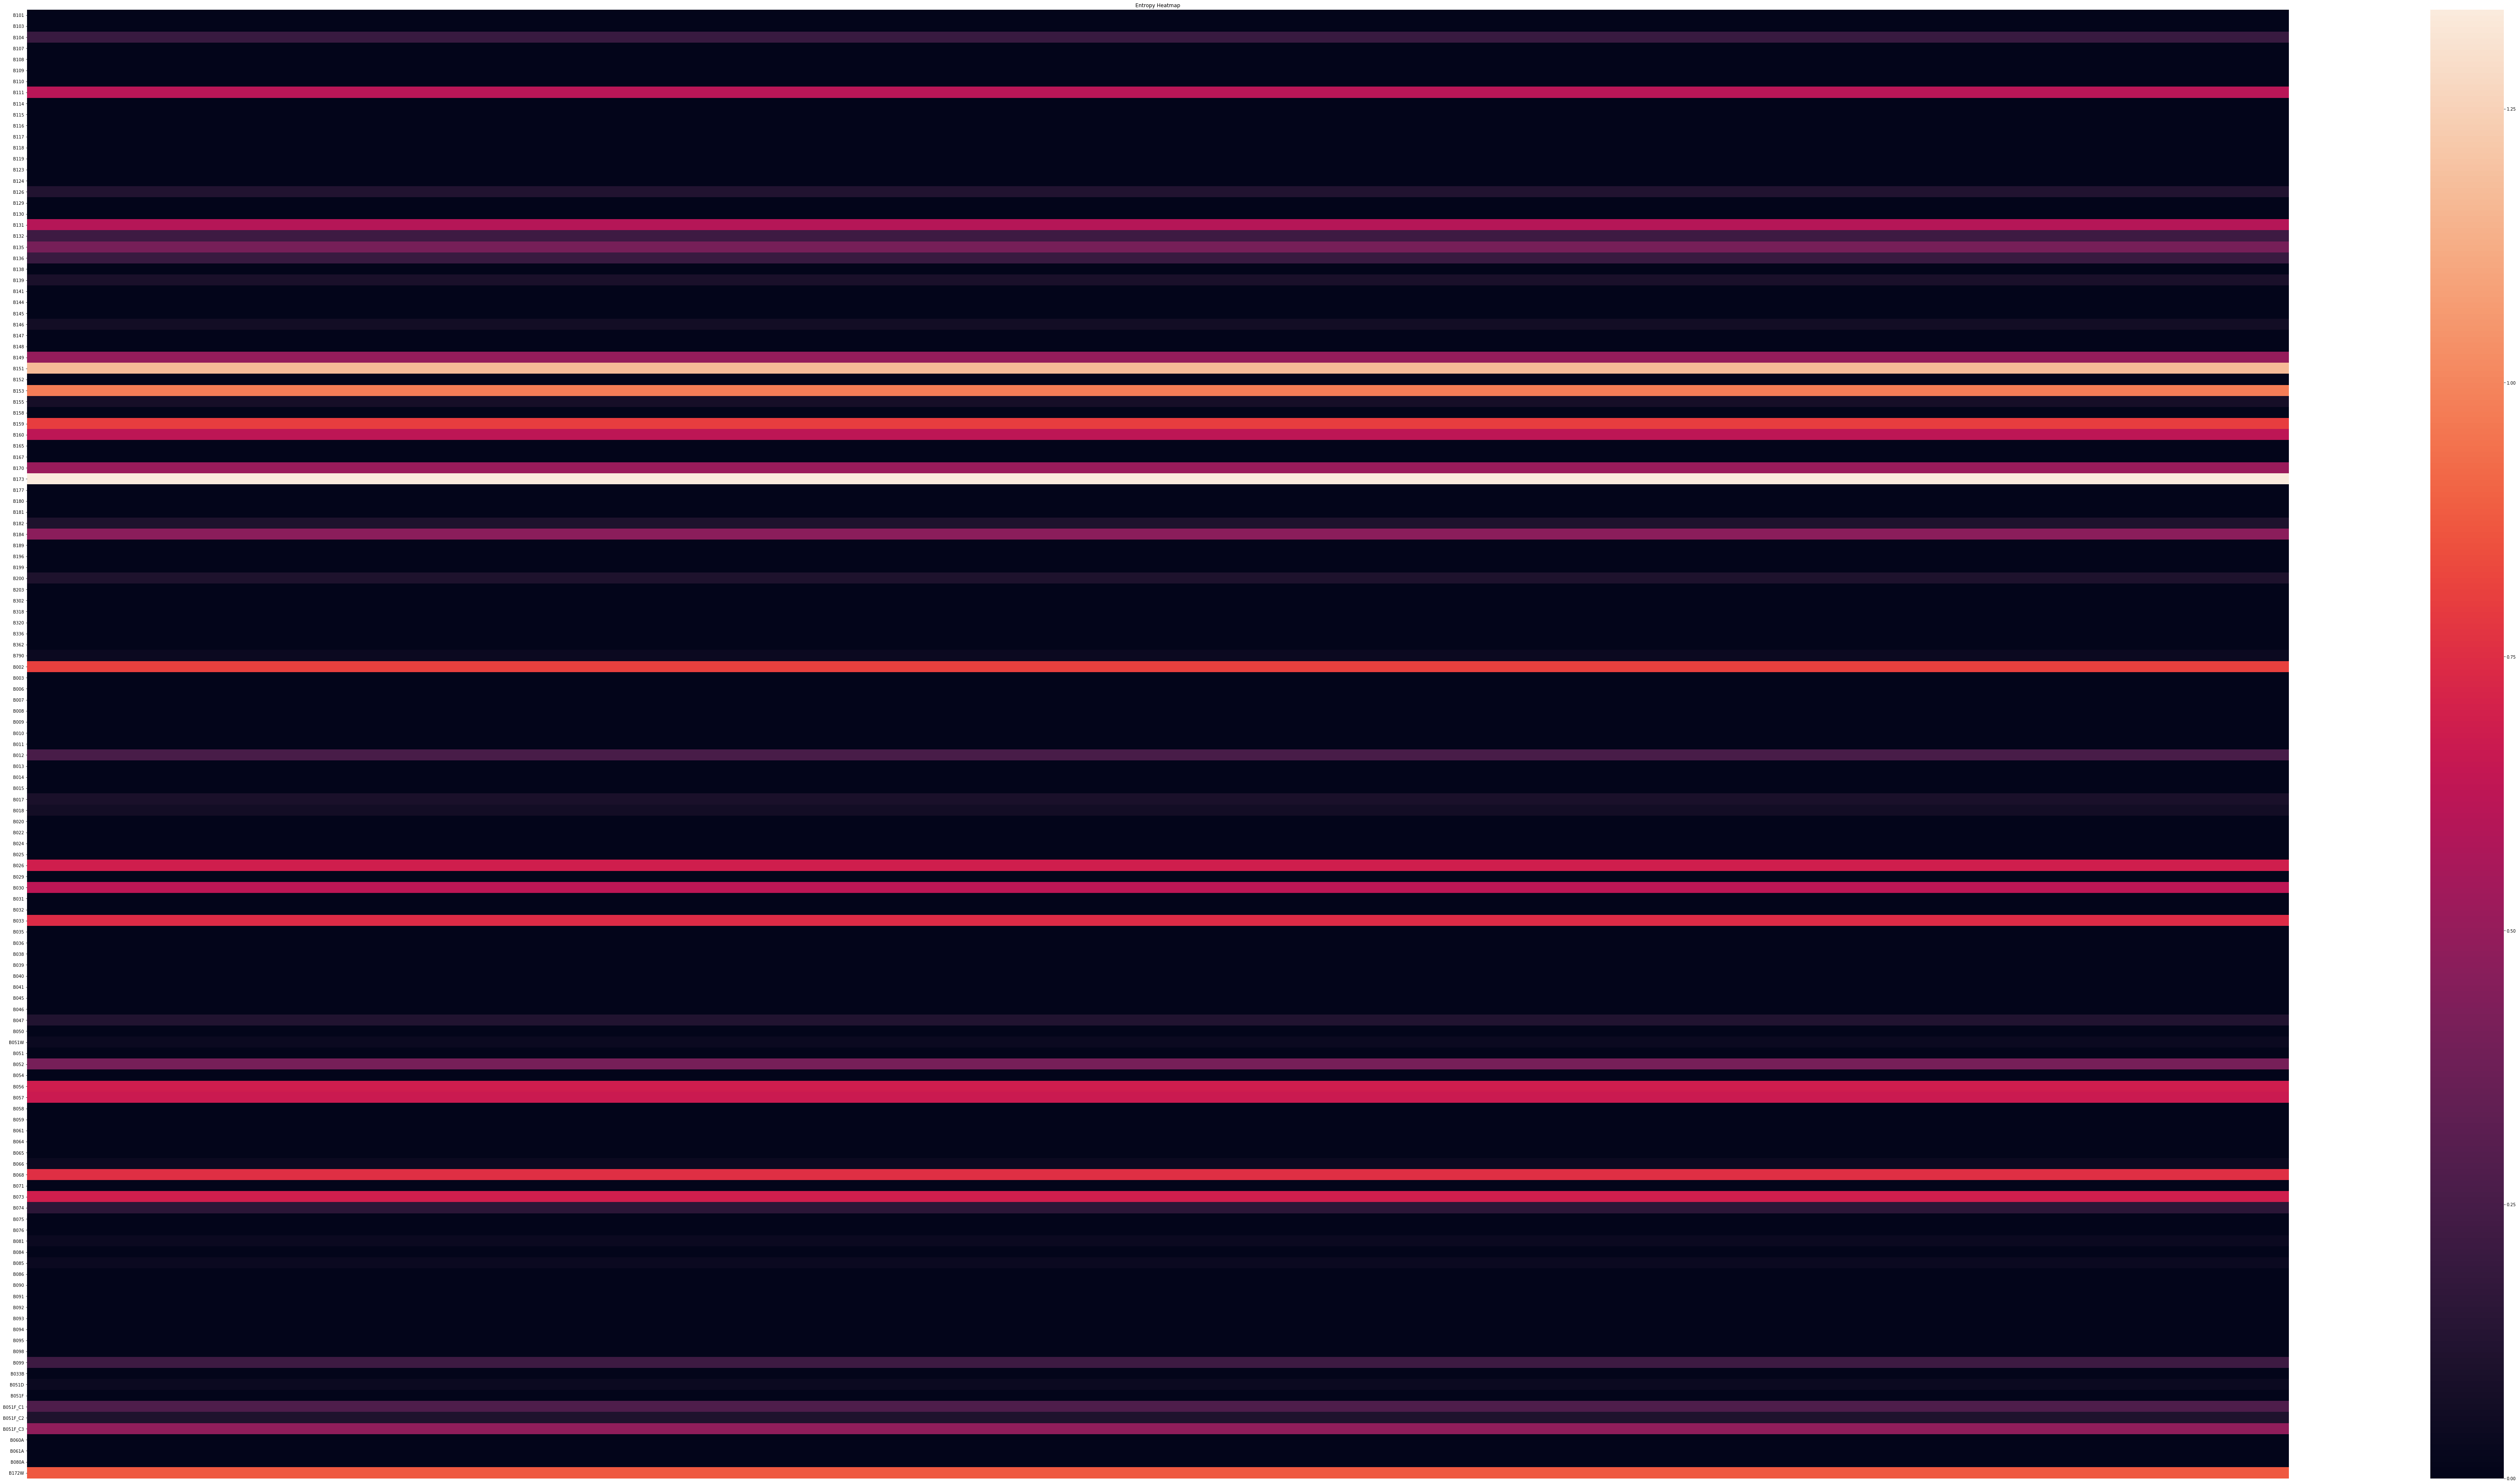

In [10]:
entr.heatmap_entr()

In [11]:
entr.entropy_sort()

(['B101',
  'B103',
  'B107',
  'B108',
  'B109',
  'B110',
  'B114',
  'B115',
  'B116',
  'B117',
  'B118',
  'B119',
  'B123',
  'B124',
  'B129',
  'B130',
  'B138',
  'B141',
  'B144',
  'B145',
  'B147',
  'B148',
  'B152',
  'B158',
  'B165',
  'B167',
  'B177',
  'B180',
  'B181',
  'B189',
  'B196',
  'B199',
  'B203',
  'B302',
  'B318',
  'B320',
  'B336',
  'B362',
  'B003',
  'B006',
  'B007',
  'B008',
  'B009',
  'B010',
  'B011',
  'B013',
  'B014',
  'B015',
  'B020',
  'B022',
  'B024',
  'B025',
  'B029',
  'B031',
  'B032',
  'B035',
  'B036',
  'B038',
  'B039',
  'B040',
  'B041',
  'B045',
  'B046',
  'B050',
  'B051',
  'B054',
  'B058',
  'B059',
  'B061',
  'B064',
  'B065',
  'B071',
  'B075',
  'B076',
  'B084',
  'B086',
  'B090',
  'B091',
  'B092',
  'B093',
  'B094',
  'B095',
  'B098',
  'B033B',
  'B051F',
  'B060A',
  'B061A',
  'B080A',
  'B790',
  'B051W',
  'B066',
  'B081',
  'B085',
  'B051D',
  'B146',
  'B018',
  'B155',
  'B139',
  'B017',
  '

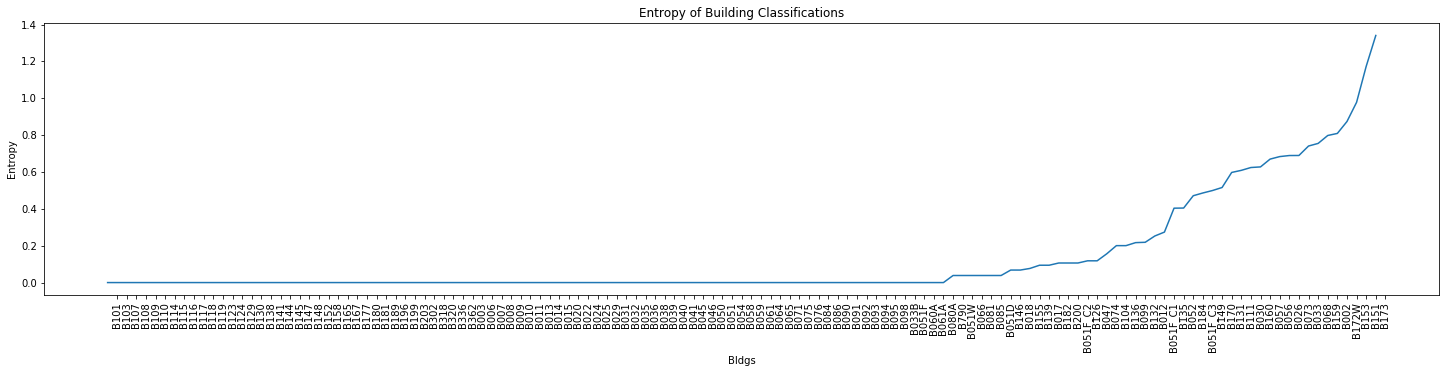

In [12]:
entr.graph_entr()

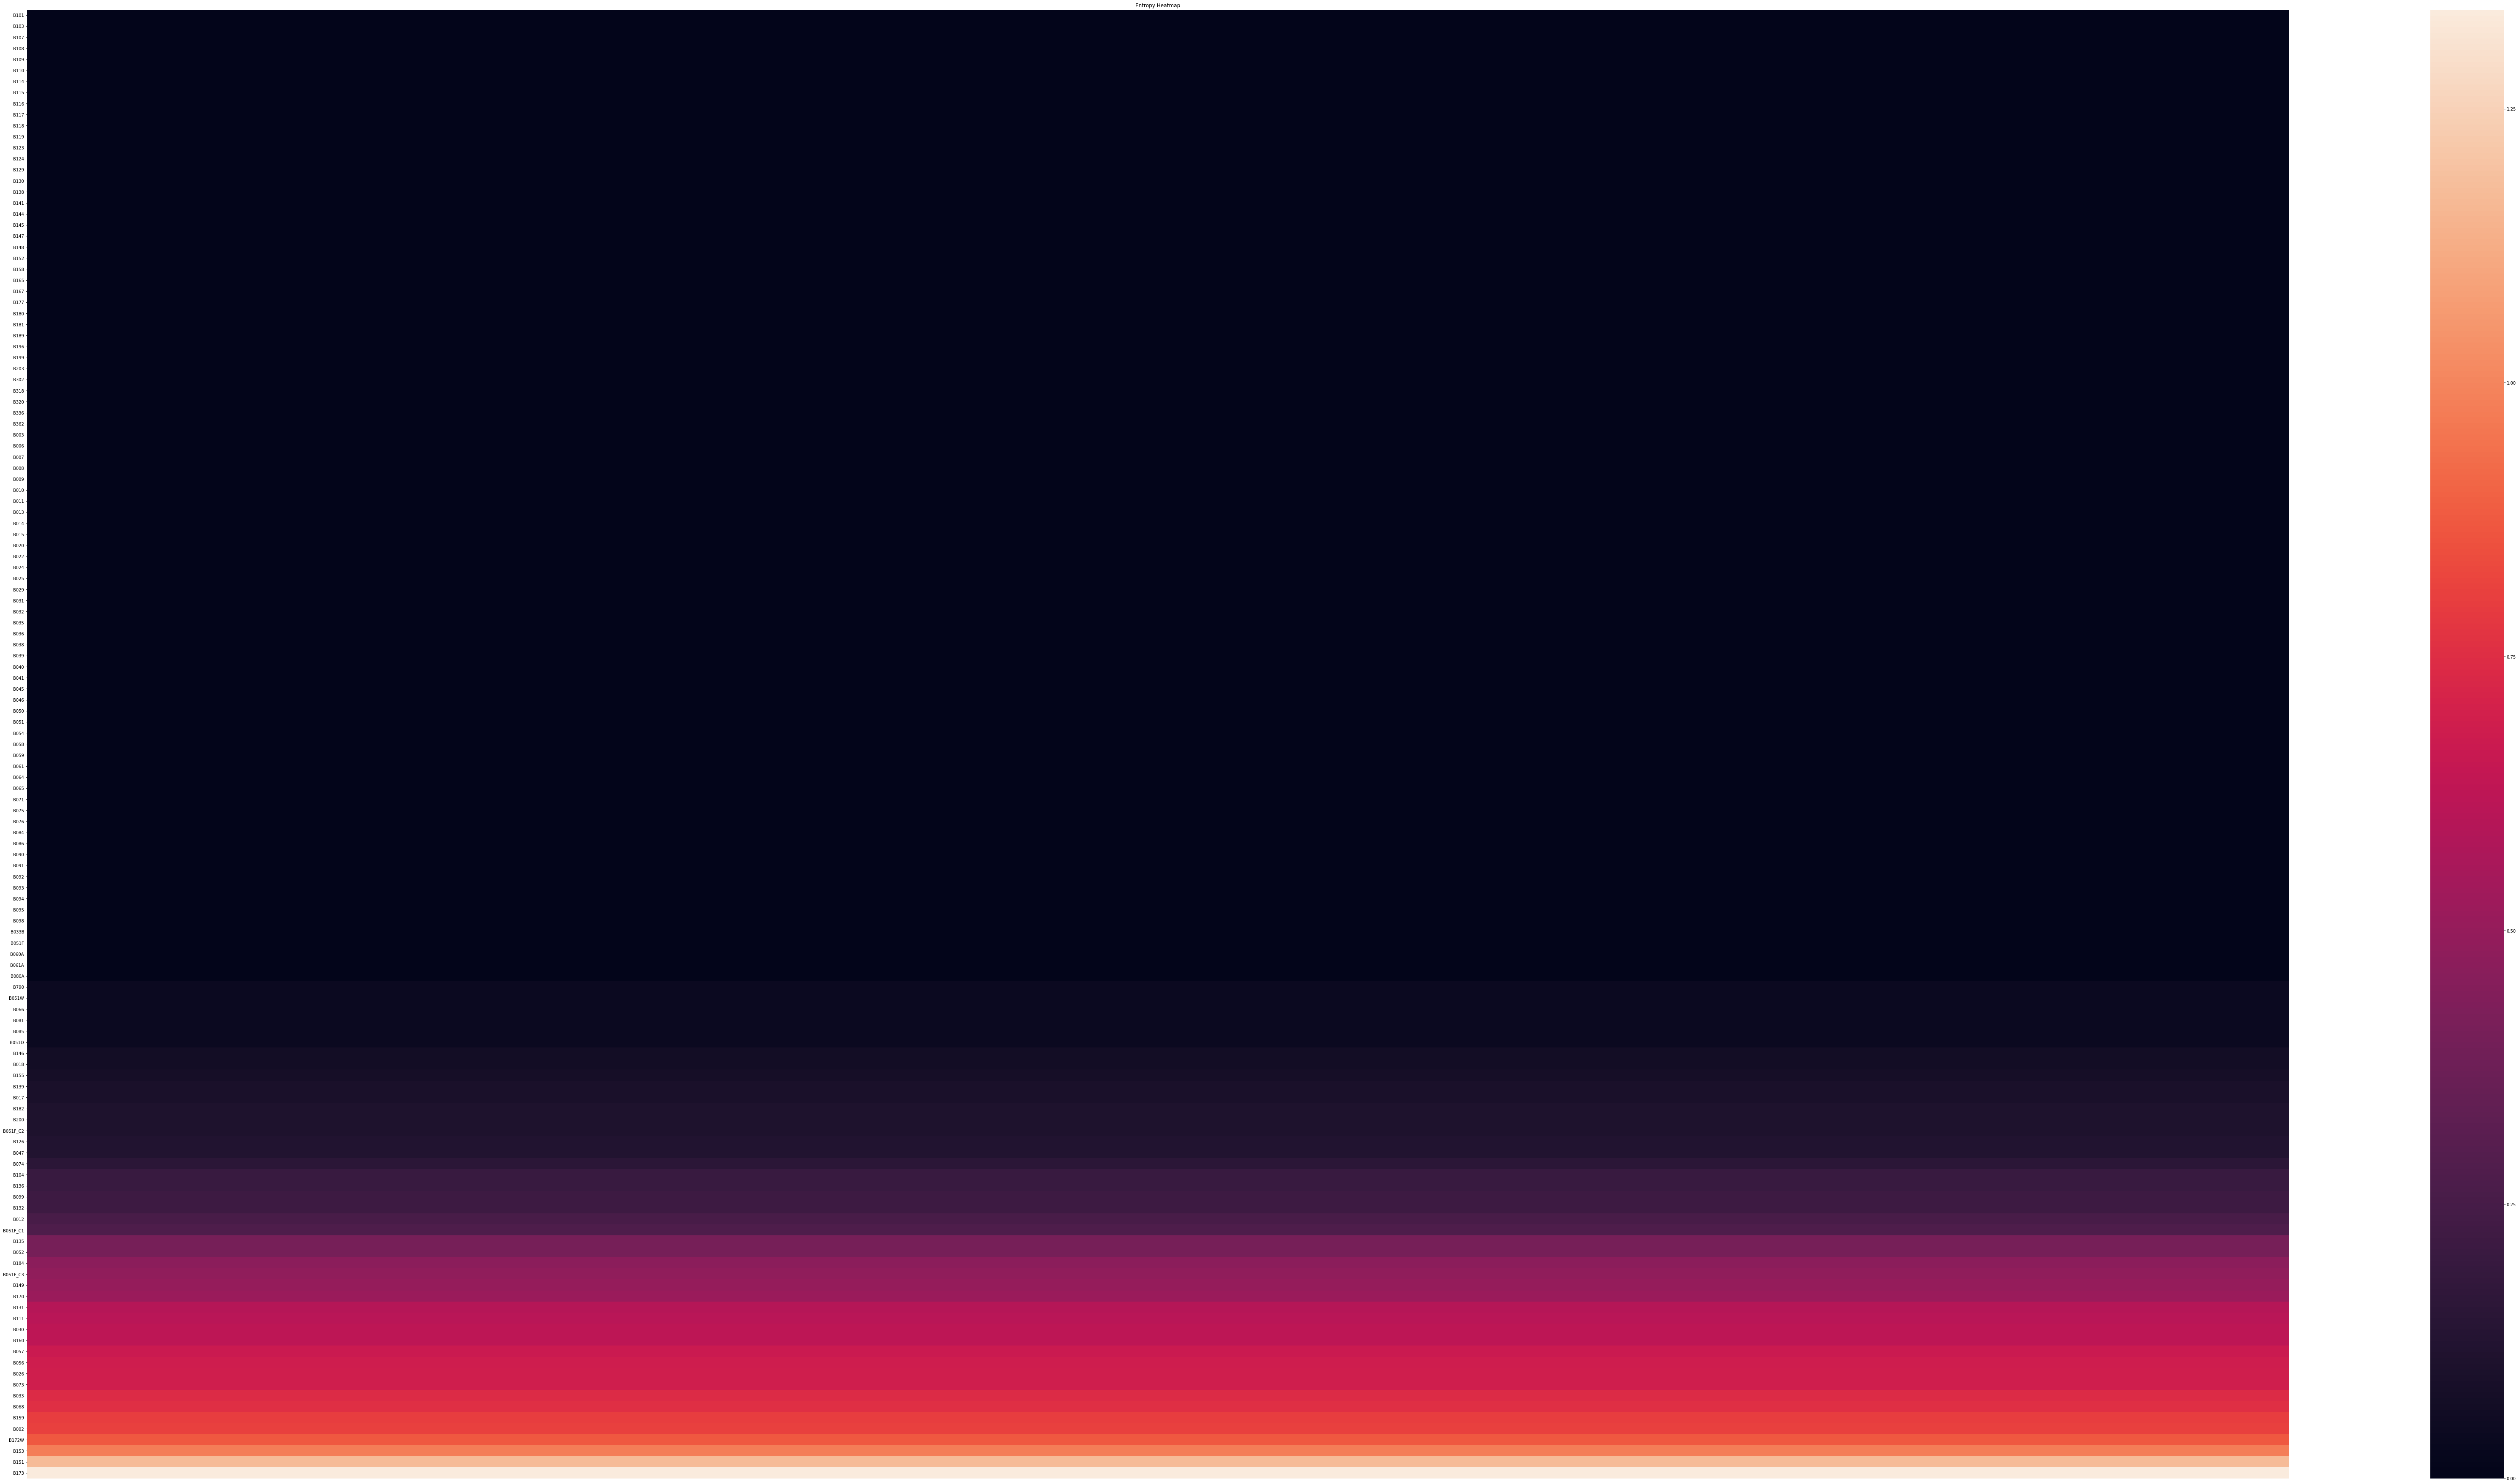

In [13]:
entr.heatmap_entr()